# Heart Disease Prediction

**Group:** AAI Group 3\
**Date:** 17 October 2024\
**Contributors:** Sai Ramanan, Prasanna G., John Kalaiselvan

## Introduction


In [4]:
%%html
<style>
table {align:left; display:block}
</style>

**Dataset:** [Heart Disease](https://www.kaggle.com/datasets/krishujeniya/heart-diseae)

The dataset was downloaded from kaggle. It containts medical data used for predicting heart disease. The following are attributes of the data:

|Name |Description|Parameter|Type of variable|
|:-----|:-----|:-----|:-----|
|age |Age of the patient |Years |Continuous | 
|sex |Sex of the patient |1: Male 0: Female |Discrete | 
|cp |Chest pain type |1-4 |Discrete |
|trestbps |Resting blood pressure | mm Hg on admission to the hospital |Continuous |
|chol |Serum cholesterol |mg/dl |Continuous |
|fbs |Fasting blood sugar > 120 mg/dl |1: True 0: False | Discrete |
|restecg |Resting electrocardiographic results |0-2 |Discrete |
|thalach |Maximum heart rate achieved |bpm |Continuous |
|exang |Exercise-induced angina |1: Yes 0:No |Discrete |
|oldpeak |ST depression induced by exercise relative to rest| |Continuous |
|slope |Slope of Peak Exercise ST Segment |0: Upsloping 1: Flat 2: Downsloping|Discrete |
|ca |Number of Major Vessels |0-3 |Discrete|
|thal |Thalassemia |1: Normal 2: Fixed defect 3: Reversible defect|Discrete |
|target |Indicates the presence or absence of heart disease | 1: Presence 0: Absence |Discrete |

## Data Cleaning/Preparation

In [26]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [6]:
# Import the dataset
df_heart = pd.read_csv('heart-disease.csv', sep=',')
df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Print dataset info
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Remove duplicates
df_heart = df_heart.drop_duplicates()

# Handle missing values (e.g., fill with mean)
for name, series in df_heart.items():
    df_heart[name] = df_heart[name].fillna(df_heart[name].mean())

## Exploratory Data Analysis

### Summary statistics of the dataset

In [13]:
# Dataset summary after handling missing values
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Distribution of the target variable

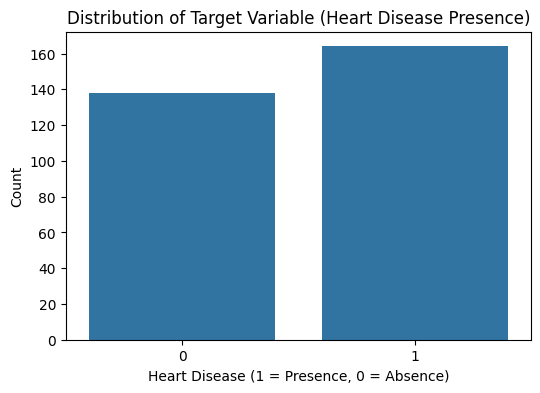

In [20]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_heart)
plt.title('Distribution of Target Variable (Heart Disease Presence)')
plt.xlabel('Heart Disease (1 = Presence, 0 = Absence)')
plt.ylabel('Count')
plt.show()

#### Correlation matrix

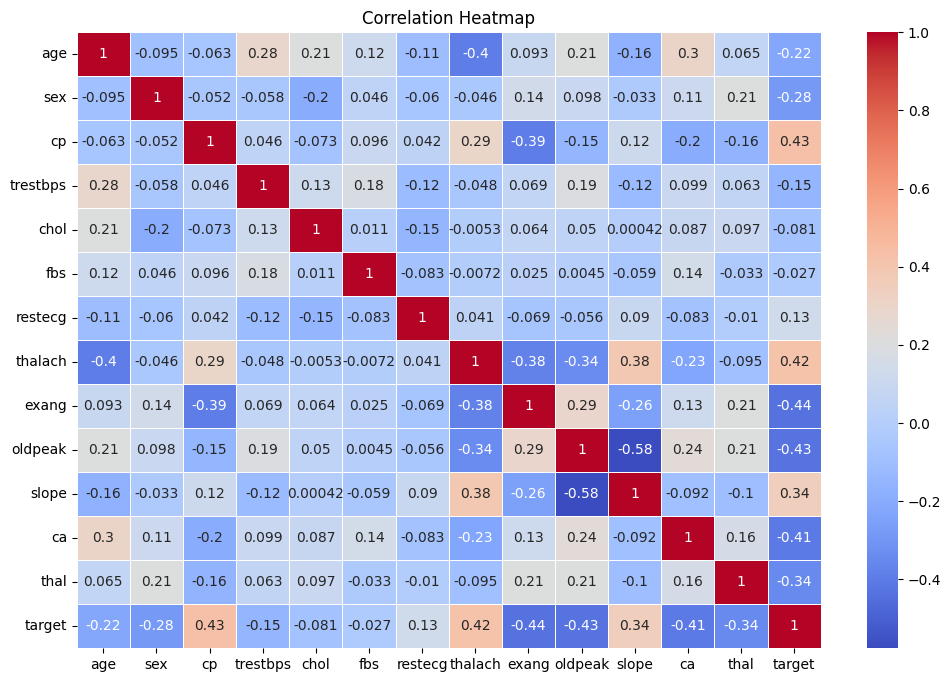

In [24]:
# Correlation matrix
corr_matrix = df_heart.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Box plot to find outliers

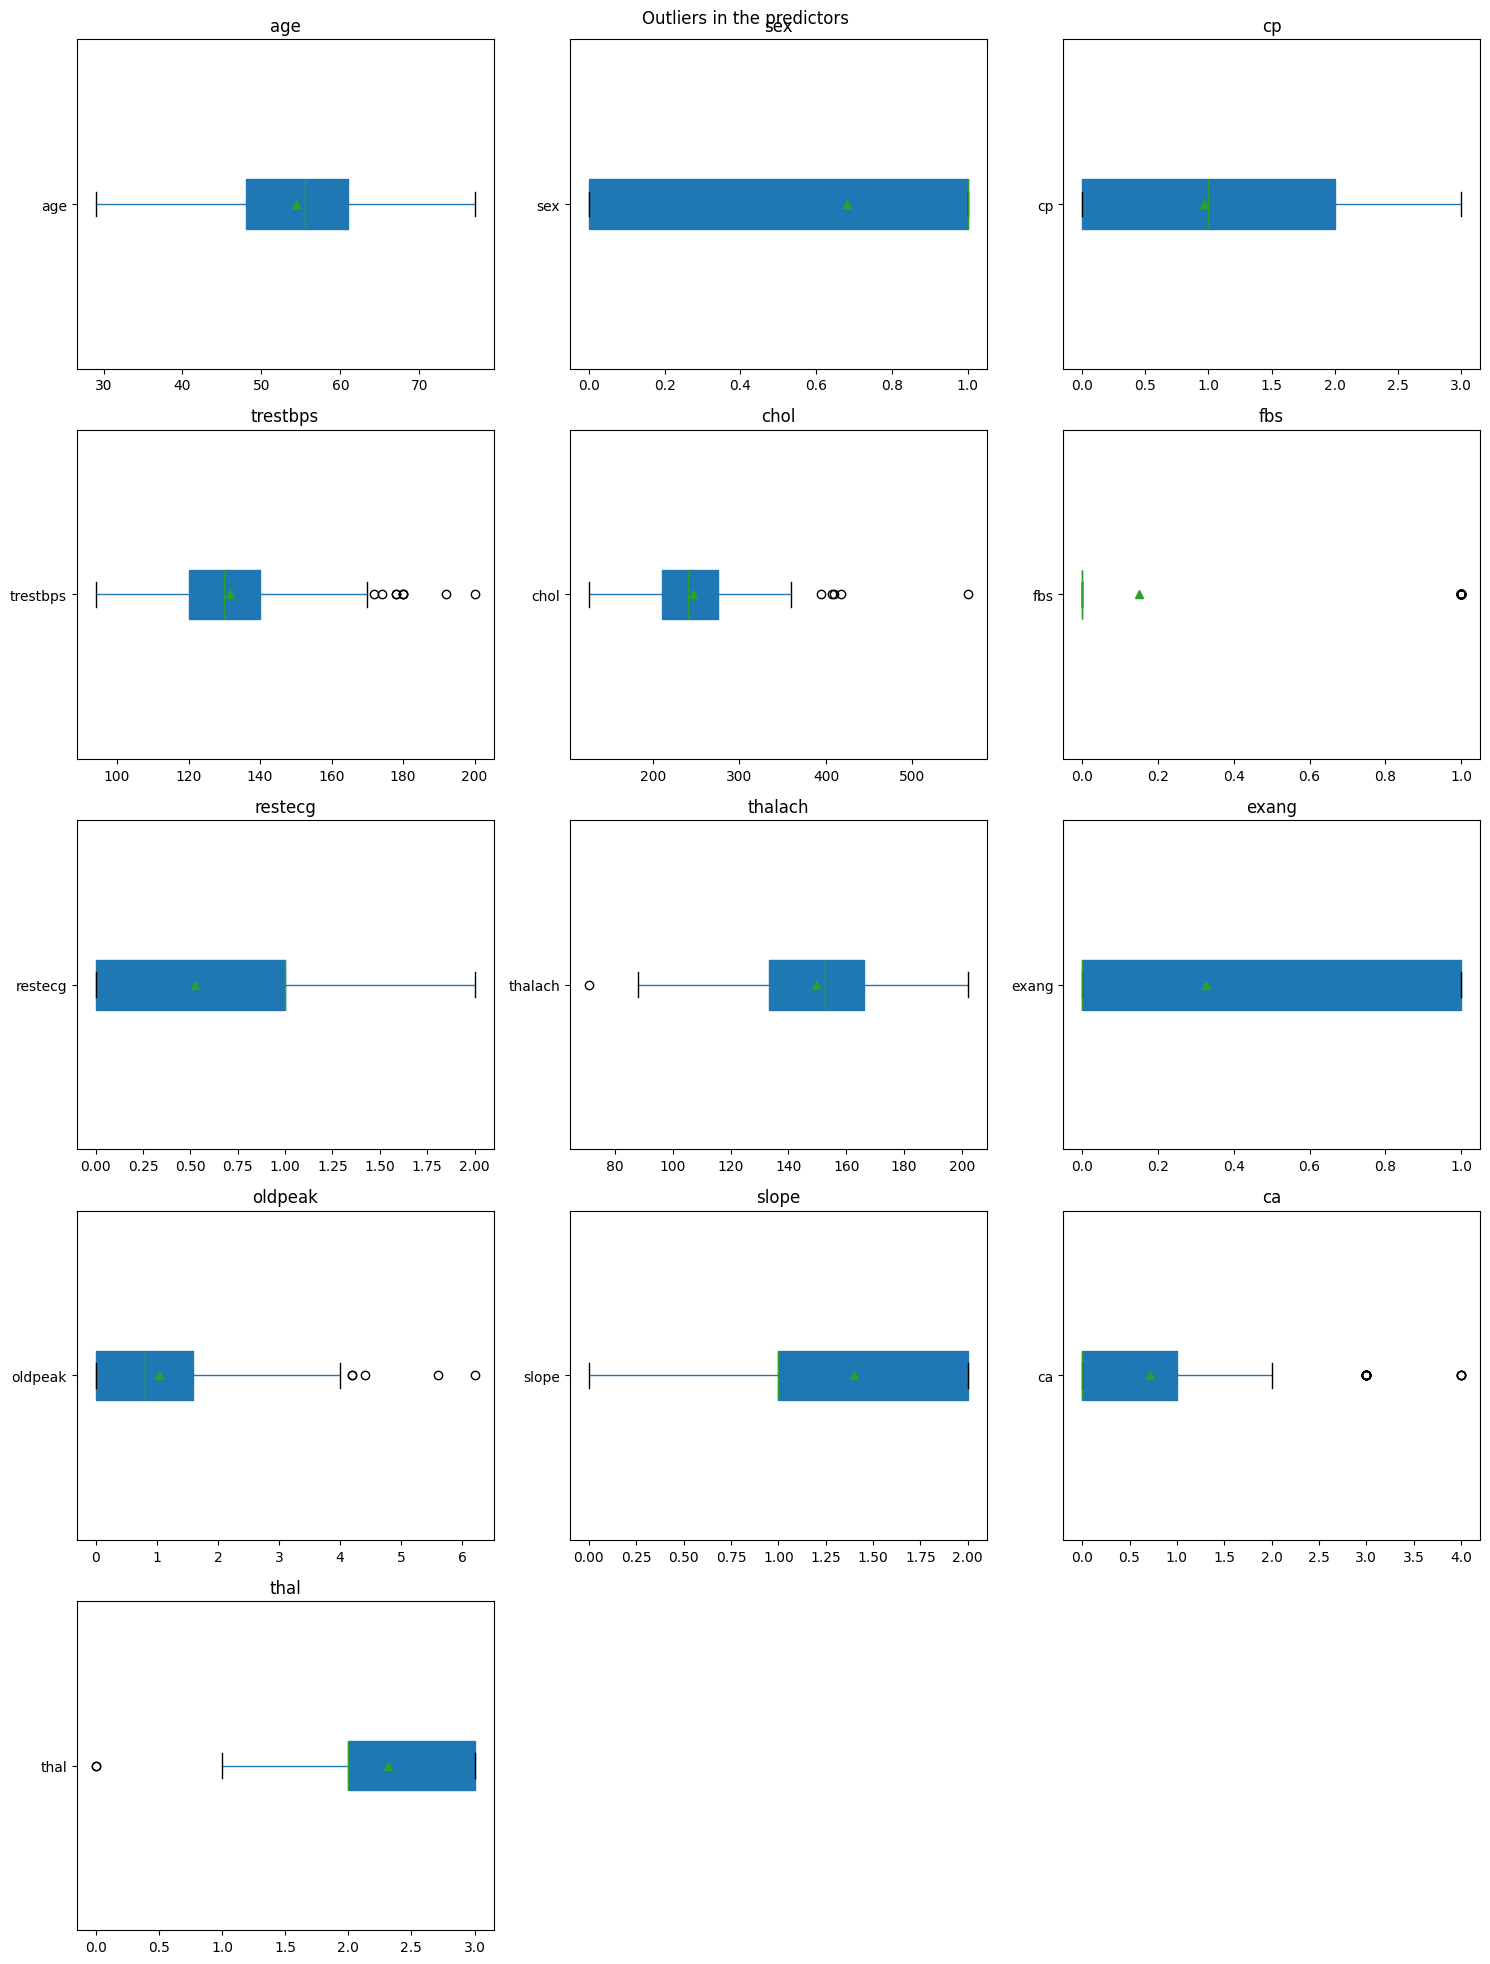

In [65]:
# Number of rows and columns for subplots
nrows = 5
ncols = 3

# Box Plot to find Outliers
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 20))
fig.suptitle("Outliers in the predictors")

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(df_heart.columns):
    if(col != "target"):
        df_heart.boxplot(column=col, ax=axes[i], showmeans=True, patch_artist=True, vert=False)
        axes[i].set_title(col)
        axes[i].grid(False)
#        axes.set_xlabel(i)

# Remove any unused subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Model Selection

## Model Analysis

## Conclusion and Recommendations